# averaging color images

## load database

In [1]:
import os
# database to download at https://github.com/laurentperrinet/PerrinetBednar15/tree/master/database/serre07_targets
img_dataset_path = '/Users/laurentperrinet/quantic/science/Hugo/OrientationPrecision/deep-bandwidth/datasets/serre07/serre07_targets'

# %ls {img_dataset_path}


In [2]:
from PIL import Image, ImageOps
image = Image.open(os.path.join(img_dataset_path, 'B_N100040.jpg'))

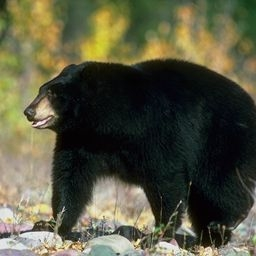

In [3]:
image

In [4]:
image.size


(256, 256)

In [5]:
import numpy as np        
image = np.array(image)
N_X, N_Y, three = image.shape

In [6]:
import glob
glob_pattern = glob.glob(os.path.join(img_dataset_path, '*.jpg'))
N_image = len(glob_pattern)
N_image


600

In [7]:
images = np.empty((N_image, N_X, N_Y, three))
for i_image, fname in enumerate(glob_pattern):
    images[i_image, ...] = np.array(Image.open(fname)) / 255.

In [8]:
images[i_image, ...]

array([[[0.80392157, 0.78039216, 0.54509804],
        [0.7372549 , 0.70196078, 0.47843137],
        [0.51764706, 0.45098039, 0.24705882],
        ...,
        [0.29411765, 0.15294118, 0.06666667],
        [0.28627451, 0.14509804, 0.05882353],
        [0.23921569, 0.09803922, 0.01176471]],

       [[0.80392157, 0.78039216, 0.54509804],
        [0.66666667, 0.63137255, 0.4       ],
        [0.56078431, 0.49803922, 0.29411765],
        ...,
        [0.3254902 , 0.18431373, 0.09803922],
        [0.30980392, 0.16862745, 0.08235294],
        [0.27843137, 0.1372549 , 0.05098039]],

       [[0.63921569, 0.62352941, 0.37647059],
        [0.58039216, 0.55686275, 0.32156863],
        [0.53333333, 0.48235294, 0.2745098 ],
        ...,
        [0.38823529, 0.24705882, 0.16078431],
        [0.32156863, 0.18039216, 0.09411765],
        [0.37254902, 0.23137255, 0.14509804]],

       ...,

       [[0.32156863, 0.24705882, 0.07843137],
        [0.3372549 , 0.2627451 , 0.09411765],
        [0.32156863, 0

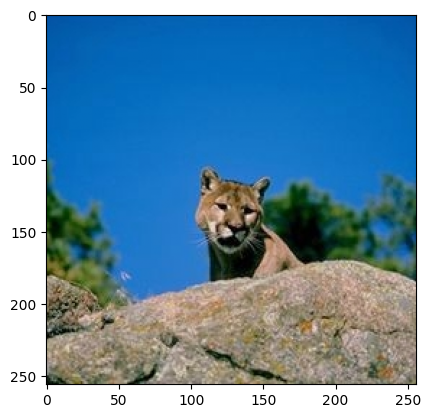

In [9]:
import matplotlib.pyplot as plt
i_image = 42
plt.imshow(images[i_image, :, :, :])

## making an average

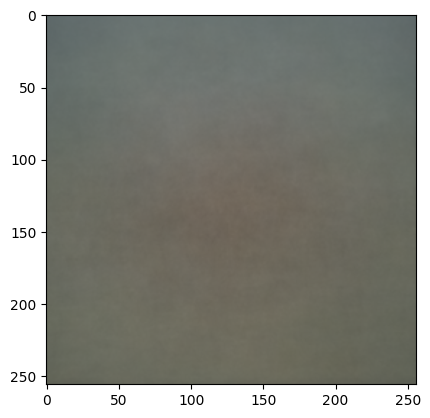

In [10]:
# average on the database
image_mean = images.mean(axis=0)
plt.imshow(image_mean);

In [11]:
def full_contrast(image):
    return (image - image.min()) / (image.max() - image.min())
image_mean = full_contrast(image_mean)

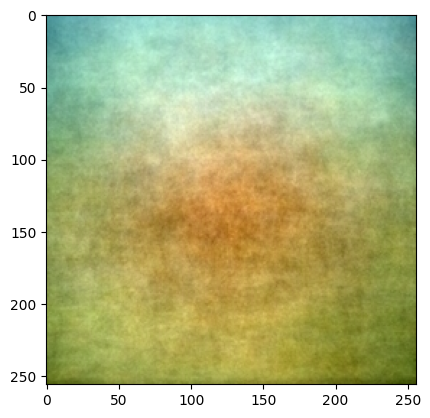

In [12]:
plt.imshow(image_mean);

In [13]:
import imageio
imageio.imsave('image_mean.png', image_mean)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Le ciel est, l'herbe est verte et les animaux plutot bruns.

## making an average with translations

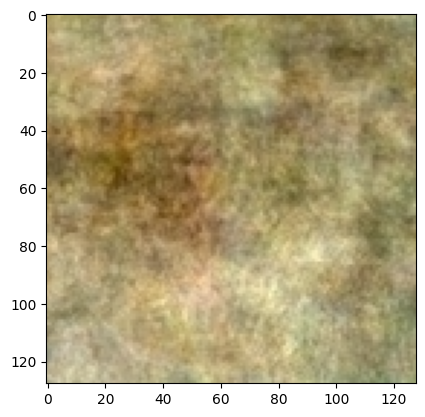

In [14]:

def mix(images, N_average=100, ds=2):
    image_mean = np.zeros((N_X//ds, N_Y//ds, three))
    for i in range(N_average):
        i_image = np.random.randint(N_image)
        # select a pixel on the upper left quadrant
        N_X_shift, N_Y_shift = np.random.randint(N_X//ds), np.random.randint(N_Y//ds)
        
        image_ = images[i_image, N_X_shift:(N_X_shift+N_X//ds), N_Y_shift:(N_Y_shift+N_Y//ds), :]
        if np.random.randint(2): # coin flip
            image_ = image_[::-1, :, :]
        if np.random.randint(2): # coin flip
            image_ = image_[:, ::-1, :]
        image_mean += image_

    return full_contrast(image_mean)

image_mean = mix(images, N_average=100, ds=2)
plt.imshow(image_mean);

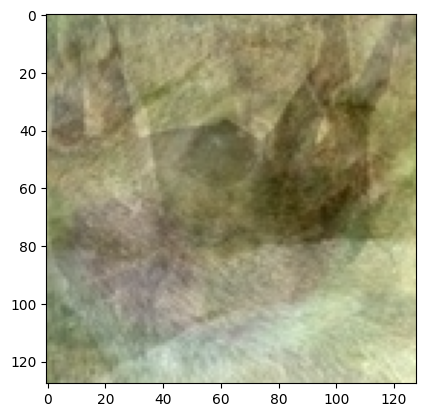

In [15]:
plt.imshow(mix(images, N_average=10, ds=2));

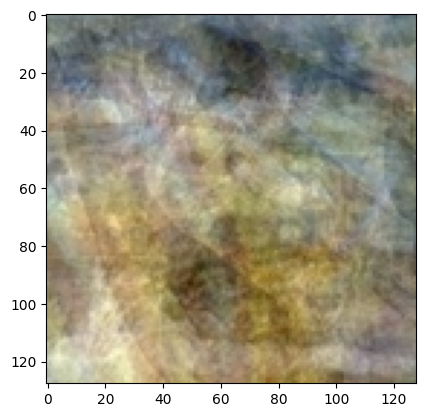

In [16]:
plt.imshow(mix(images, N_average=20, ds=2));

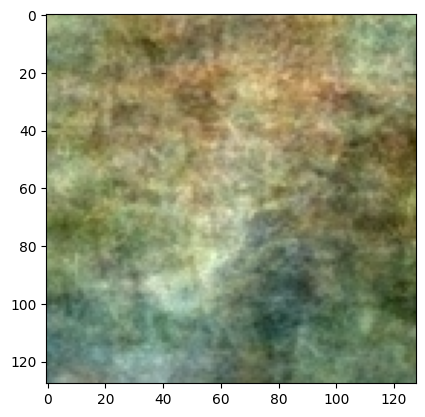

In [17]:
plt.imshow(mix(images, N_average=50, ds=2));

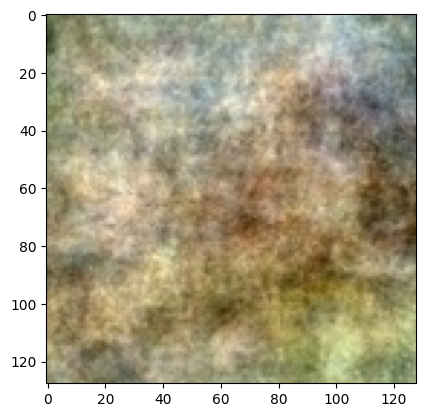

In [18]:
plt.imshow(mix(images, N_average=100, ds=2));

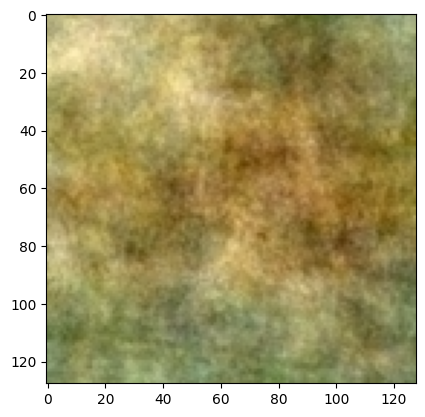

In [19]:
plt.imshow(mix(images, N_average=200, ds=2));

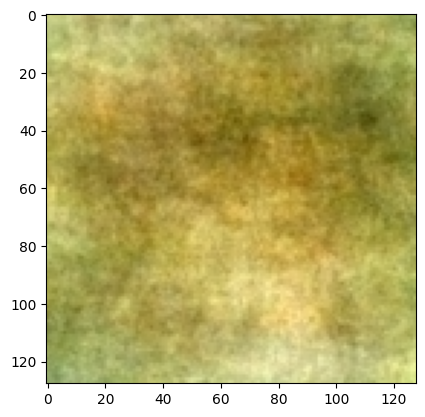

In [20]:
plt.imshow(mix(images, N_average=500, ds=2));

## making an average with translations on luminosities

In [21]:
images.min(), images.max()

(0.0, 1.0)

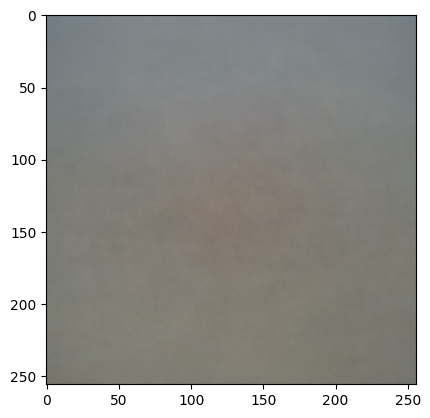

In [22]:
# average on the database
gamma=2.2
image_mean = ((images**(gamma)).mean(axis=0))**(1/gamma)
plt.imshow(image_mean);

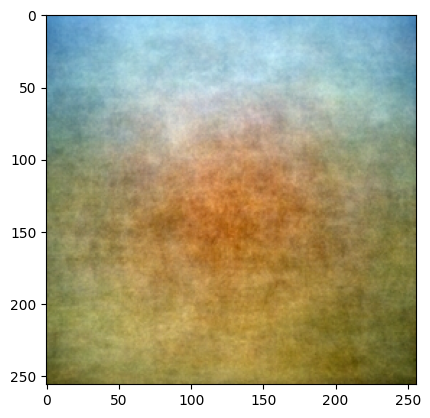

In [23]:
image_mean = full_contrast(image_mean)
plt.imshow(image_mean);

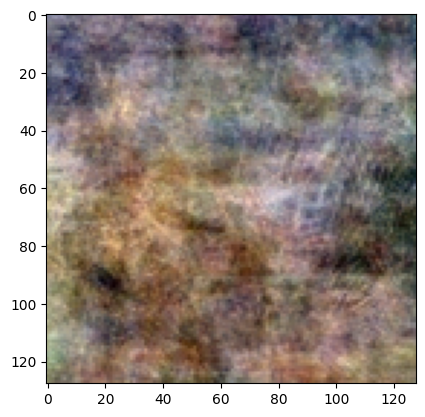

In [24]:

def mix(images, N_average=100, ds=2, gamma=gamma):
    lum_image_mean = np.zeros((N_X//ds, N_Y//ds, three))
    for i in range(N_average):
        i_image = np.random.randint(N_image)
        # select a pixel on the upper left quadrant
        N_X_shift, N_Y_shift = np.random.randint(N_X//ds), np.random.randint(N_Y//ds)
        
        image_ = images[i_image, N_X_shift:(N_X_shift+N_X//ds), N_Y_shift:(N_Y_shift+N_Y//ds), :]
        if np.random.randint(2): # coin flip
            image_ = image_[::-1, :, :]
        if np.random.randint(2): # coin flip
            image_ = image_[:, ::-1, :]

        
        lum_image_mean += image_**(gamma)

    return full_contrast(lum_image_mean**(1/gamma))

image_mean = mix(images, N_average=100, ds=2)
plt.imshow(image_mean);

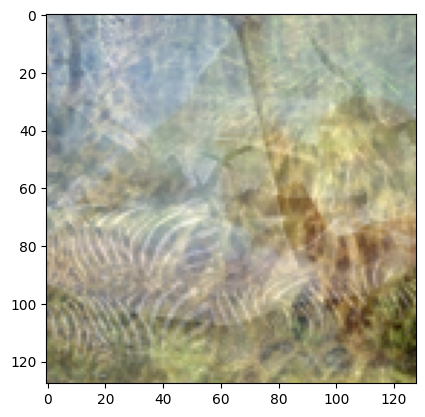

In [25]:
plt.imshow(mix(images, N_average=10, ds=2));

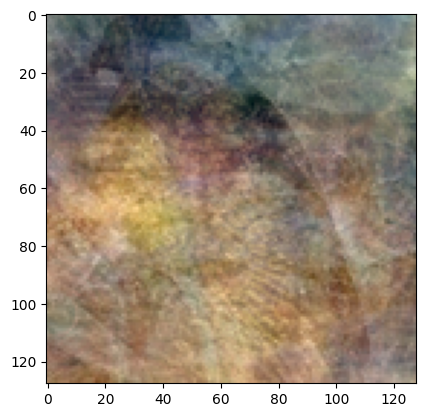

In [26]:
plt.imshow(mix(images, N_average=20, ds=2));

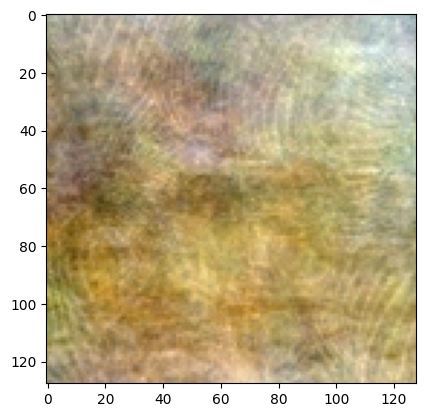

In [27]:
plt.imshow(mix(images, N_average=50, ds=2));

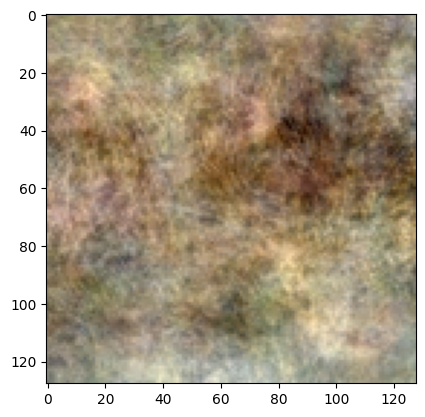

In [28]:
plt.imshow(mix(images, N_average=100, ds=2));

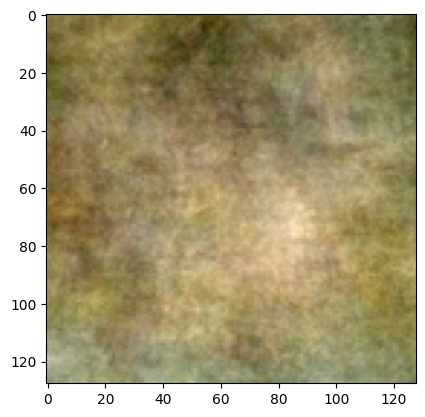

In [29]:
plt.imshow(mix(images, N_average=200, ds=2));

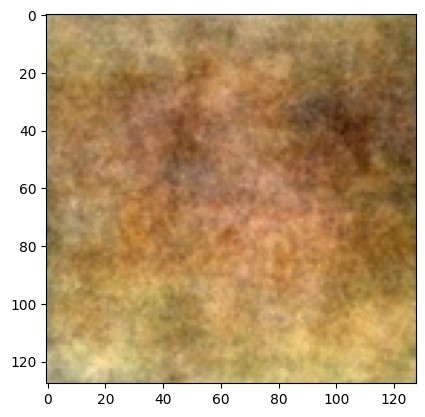

In [30]:
plt.imshow(mix(images, N_average=500, ds=2));

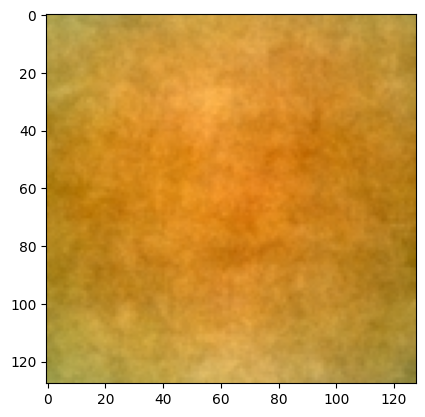

In [31]:
plt.imshow(mix(images, N_average=5000, ds=2));

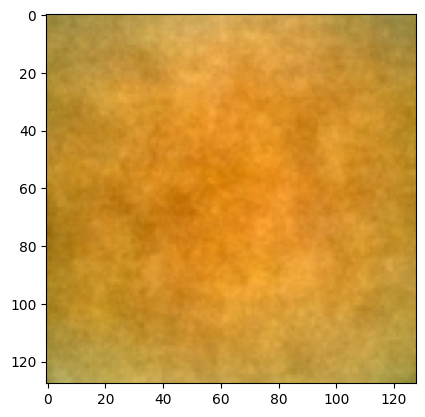

In [32]:
plt.imshow(mix(images, N_average=5000, ds=2));

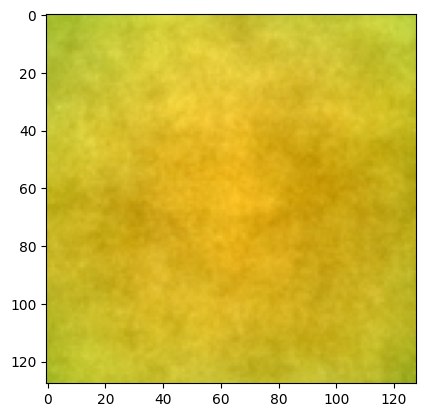

In [33]:
plt.imshow(mix(images, N_average=5000, ds=2, gamma=1/2.2));